# TSP with Continuous Encoding using TrainSelPy

This notebook solves the Traveling Salesman Problem (TSP) using a continuous vector encoding. 
The order of cities is determined by sorting the continuous values.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from evosolve import train_sel, train_sel_control

# 1. Generate TSP Instance
def generate_tsp_instance(n_cities=20, random_seed=42):
    np.random.seed(random_seed)
    city_coords = np.random.rand(n_cities, 2) * 100
    distance_matrix = np.zeros((n_cities, n_cities))
    for i in range(n_cities):
        for j in range(n_cities):
            if i != j:
                distance_matrix[i, j] = np.sqrt(np.sum((city_coords[i] - city_coords[j])**2))
    return {'city_coords': city_coords, 'distance_matrix': distance_matrix}

n_cities = 50
tsp_data = generate_tsp_instance(n_cities)
print(f"Generated TSP instance with {n_cities} cities")

Generated TSP instance with 50 cities


In [29]:
# 2. Define Fitness Function for Continuous Encoding
def tsp_fitness_continuous(dbl_sol, data):
    """
    Fitness function for TSP with continuous encoding.
    dbl_sol: numpy array of continuous values (size = n_cities)
    data: dictionary containing distance_matrix
    """
    # Get the permutation by sorting the continuous values
    # dbl_sol is a single numpy array because we have one set of DBL variables
    permutation = np.argsort(dbl_sol)
    
    dist_matrix = data['distance_matrix']
    total_dist = 0.0
    n = len(permutation)
    
    for i in range(n):
        u = permutation[i]
        v = permutation[(i + 1) % n]
        total_dist += dist_matrix[u, v]
        
    # Return negative distance because TrainSelPy maximizes fitness
    return -total_dist


In [30]:
# 3. Run TrainSel Optimization
print("Starting optimization...")

# Candidate list is just a placeholder for DBL type, but needs to match length
candidates = [list(range(n_cities))]
setsizes = [n_cities]
settypes = ["DBL"]

# Configure control parameters
control = train_sel_control(
    npop=10000,
    niterations=1000,
    nEliteSaved=5,
    nelite=200,
    mutprob=0.2,      # Probability of mutating a variable
    mutintensity=0.1, # Perturbation magnitude for DBL variables
    crossprob=0.5,
    progress=True,
    use_cma_es=True,   # Use CMA-ES for continuous variables if available/enabled
    cma_es_sigma=0.3
)

result = train_sel(
    data=tsp_data,
    candidates=candidates,
    setsizes=setsizes,
    settypes=settypes,
    stat=tsp_fitness_continuous,
    control=control,
    verbose=True
)

print(f"Best Fitness: {result.fitness}")
print(f"Best Tour Distance: {-result.fitness}")

Starting optimization...
Starting TrainSelPy optimization
Starting GA with population size 10000
Initial best fitness: -1989.2135249131227
Initialized CMA-ES for continuous variables (sigma=0.3)
Generation 0: Best fitness = -1989.2135249131227
Generation 10: Best fitness = -1644.6655601751856
Generation 20: Best fitness = -1597.7746611213274
Generation 30: Best fitness = -1365.2693190049263
Generation 40: Best fitness = -1053.7471068324949
Generation 50: Best fitness = -1004.3420902995462
Generation 60: Best fitness = -911.6947746902008
Generation 70: Best fitness = -885.3488809961616
Generation 80: Best fitness = -827.5780984435081
Generation 90: Best fitness = -823.6471292496287
Generation 100: Best fitness = -807.609312135207
Generation 110: Best fitness = -778.1893700966243
Generation 120: Best fitness = -778.1893700966243
Generation 130: Best fitness = -764.4424068714284
Generation 140: Best fitness = -764.4424068714284
Generation 150: Best fitness = -764.4424068714284
Generation 

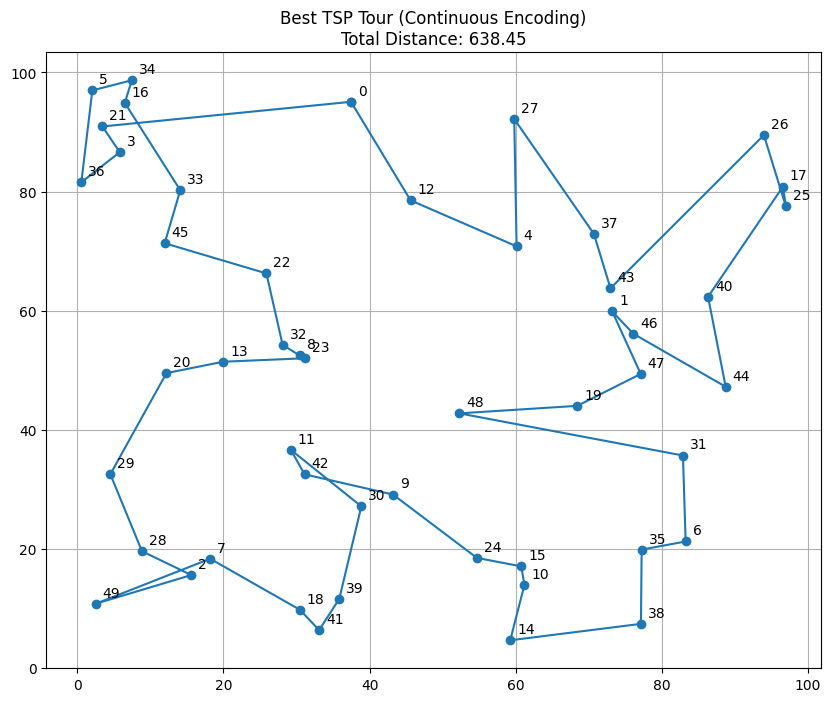

In [31]:
# 4. Visualize the Best Solution
best_continuous_values = result.selected_values[0]
best_permutation = np.argsort(best_continuous_values)

coords = tsp_data['city_coords']
tour_coords = coords[best_permutation]
# Add start point to end to close the loop for plotting
tour_coords = np.vstack([tour_coords, tour_coords[0]])

plt.figure(figsize=(10, 8))
plt.plot(tour_coords[:, 0], tour_coords[:, 1], 'o-')
plt.title(f"Best TSP Tour (Continuous Encoding)\nTotal Distance: {-result.fitness:.2f}")
plt.grid(True)
for i, txt in enumerate(best_permutation):
    plt.annotate(str(txt), (coords[txt, 0], coords[txt, 1]), xytext=(5, 5), textcoords='offset points')
plt.show()